# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [3]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [4]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [5]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [6]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [9]:
nfeatures = x_train.shape[1]
nfeatures

3

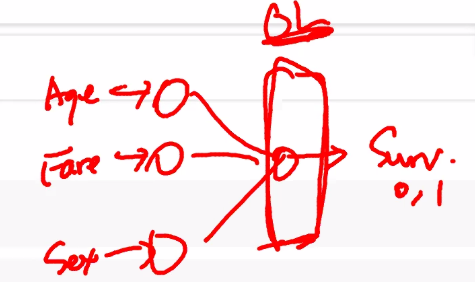

In [10]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( Dense( 1 , input_shape = (nfeatures ,), activation= 'sigmoid') ) #★

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [11]:
model.compile(optimizer = Adam(lr=0.01), loss = 'binary_crossentropy') #이진분류 모델 손실함수 #★

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 0.6784 - val_loss: 0.6715
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6748 - val_loss: 0.6673
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6711 - val_loss: 0.6636
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6679 - val_loss: 0.6599
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6649 - val_loss: 0.6567
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6620 - val_loss: 0.6536
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6592 - val_loss: 0.6506
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6566 - val_loss: 0.6478
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6543 - val_loss: 0.6451
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.6424
Epoch 11/50
16/16 

* 학습결과 그래프

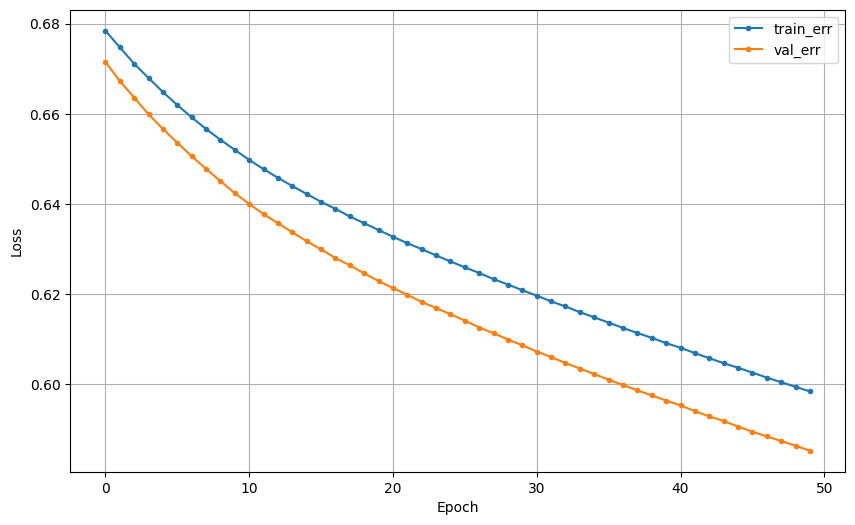

In [12]:
dl_history_plot(history)

### (3) 예측 및 검증

In [13]:
pred = model.predict(x_val)
pred[:5] # 확률값으로 나옴 => 0/1로 변환해야함 # 사이킷런은 자동으로 변환했었음 #★

9/9 [==============================] - 0s 2ms/step


array([[0.48595622],
       [0.3160861 ],
       [0.31570134],
       [0.31730133],
       [0.49088395]], dtype=float32)

In [14]:
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0) #★
pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [15]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[170   0]
 [ 98   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       170
           1       0.00      0.00      0.00        98

    accuracy                           0.63       268
   macro avg       0.32      0.50      0.39       268
weighted avg       0.40      0.63      0.49       268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4.딥러닝2 : 전체 feature
* 이제 **전체 데이터**를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [16]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [17]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [20]:
n = x_train.shape[1]
n

8

In [21]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential( Dense( 1, input_shape = (n, ), activation = 'sigmoid'))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [22]:
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split=.2).history

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.6256 - val_loss: 0.5861
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6005 - val_loss: 0.5705
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5881 - val_loss: 0.5593
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5769 - val_loss: 0.5487
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5651 - val_loss: 0.5390
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5547 - val_loss: 0.5308
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5455 - val_loss: 0.5224
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5378 - val_loss: 0.5164
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5300 - val_loss: 0.5091
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5232 - val_loss: 0.5045
Epoch 11/50
16/16 

* 학습결과 그래프

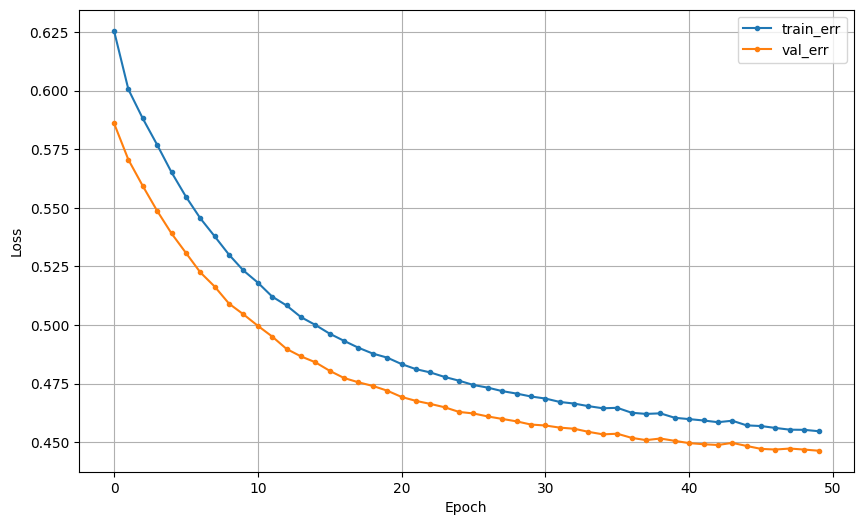

In [23]:
dl_history_plot(history)

* 예측 및 검증

In [24]:
pred2 = model.predict(x_val)
pred2 = np.where( pred2 >= .5 , 1, 0)
print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       170
           1       0.69      0.68      0.69        98

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

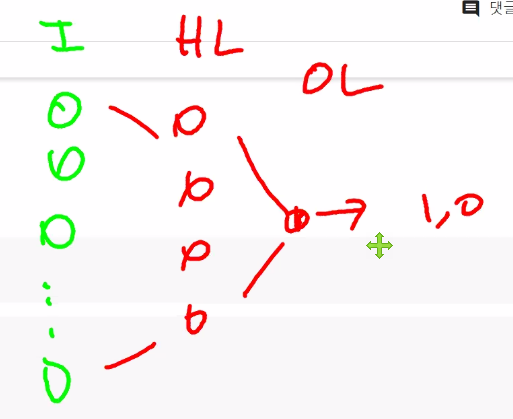

In [25]:
n = x_train.shape[1]
n

8

In [26]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([ Dense( 4, input_shape = (n ,), activation = 'relu'),
                      Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [27]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.6269 - val_loss: 0.5999
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6074 - val_loss: 0.5878
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5965 - val_loss: 0.5739
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5833 - val_loss: 0.5569
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5668 - val_loss: 0.5318
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5275 - val_loss: 0.4863
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4880 - val_loss: 0.4665
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4774 - val_loss: 0.4589
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4713 - val_loss: 0.4531
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4629 - val_loss: 0.4491
Epoch 11/50
16/16 

* 학습결과 그래프

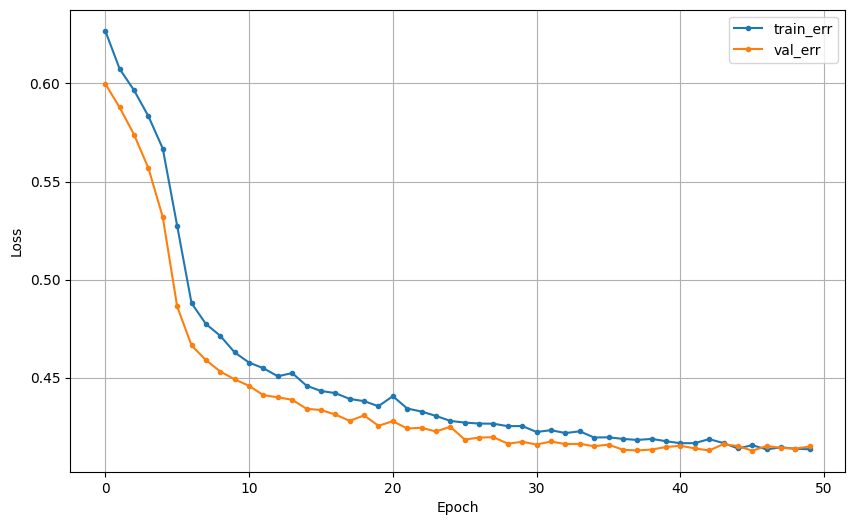

In [28]:
dl_history_plot(hist)

* 예측 및 검증

In [29]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 [==============================] - 0s 2ms/step


In [30]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       170
           1       0.76      0.62      0.69        98

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.79      0.79      0.79       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [31]:
model = Sequential([Dense( 16, input_shape=(n,), activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy')

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.5080 - val_loss: 0.4339
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4453 - val_loss: 0.4229
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4371 - val_loss: 0.4158
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4663 - val_loss: 0.4234
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4269 - val_loss: 0.4033
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4347 - val_loss: 0.3918
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4283 - val_loss: 0.4376
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4388 - val_loss: 0.4529
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4409 - val_loss: 0.3984
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4355 - val_loss: 0.4072
Epoch 11/50
16/16 

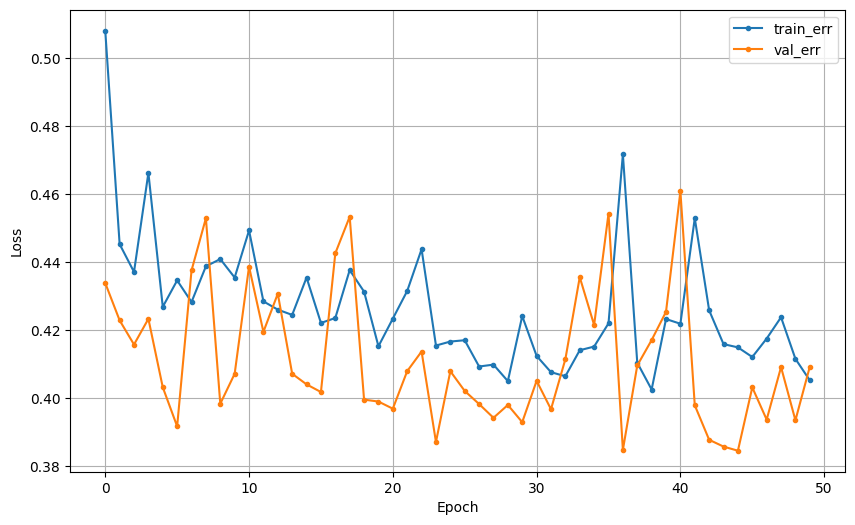

In [33]:
hist = model.fit(x_train, y_train, epochs=50, validation_split=.2).history
dl_history_plot(hist)

In [34]:
# Epoch 밑에 숫자 16)
# 배치사이즈 디폴트 행 32개씩 한묶음
# -> 평균오차 만들고 파라미터 업데이트 반복

In [35]:
pred=model.predict(x_val)
pred[:10]

9/9 [==============================] - 0s 2ms/step


array([[0.5450332 ],
       [0.12092319],
       [0.30802414],
       [0.29453367],
       [0.9605171 ],
       [0.514422  ],
       [0.290525  ],
       [0.12779339],
       [0.9584978 ],
       [0.17675625]], dtype=float32)

In [36]:
pred = np.where(pred>=.5, 1, 0)
pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [37]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       170
           1       0.69      0.72      0.71        98

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [38]:
n = x_train.shape[1]
n

8

In [39]:
model = Sequential([Dense(16, input_shape = (n,), activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 0.7617 - val_loss: 0.7470
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.7188 - val_loss: 0.7065
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6875 - val_loss: 0.6776
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6653 - val_loss: 0.6522
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6466 - val_loss: 0.6366
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6231
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6223 - val_loss: 0.6108
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.5981
Epoch 9/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5983 - val_loss: 0.5857
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5852 - val_loss: 0.5713
Epoch 11/30
16/16 

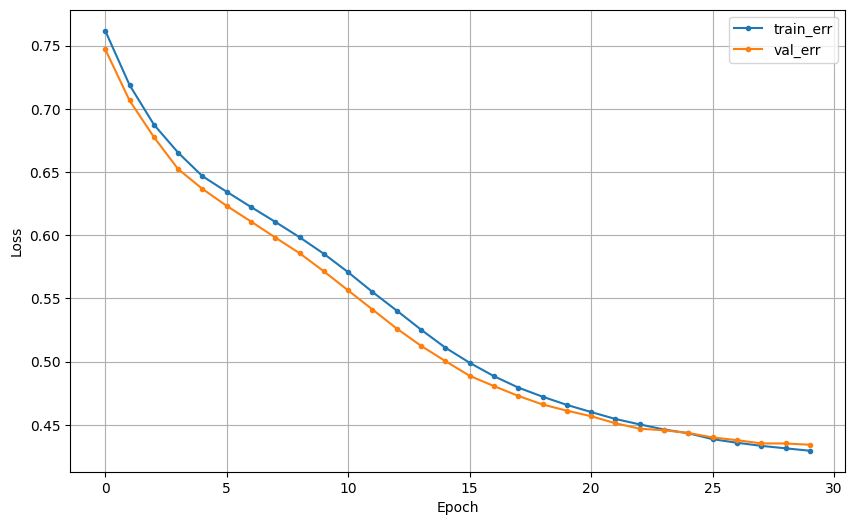

In [41]:
hist = model.fit(x_train, y_train, epochs=30, validation_split=.2).history
dl_history_plot(hist)

In [42]:
pred3 = model.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 [==============================] - 0s 3ms/step


In [43]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       170
           1       0.84      0.54      0.66        98

    accuracy                           0.79       268
   macro avg       0.81      0.74      0.76       268
weighted avg       0.80      0.79      0.78       268

